In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['bike-share-demand']


**Data Wrangling**

ETL (Extract Transform Load)

In [2]:
train = pd.read_csv('../input/bike-share-demand/train.csv')
test = pd.read_csv('../input/bike-share-demand/test.csv')
train_data = train.copy()
test_data = test.copy()

In [3]:
print(train_data.shape)
print(test_data.shape)

(10886, 13)
(6493, 10)


In [4]:
train_data.head()

,datetime,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
train.describe()

,season,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,2.998622,0.680875,1.418427,0.493436,0.473102,0.618865,0.191036,36.021955,155.552177,191.574132
std,1.116174,0.166599,2.007770,0.466159,0.633839,0.190039,0.169492,0.192450,0.121859,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.770000,0.253700,49.000000,222.000000,284.000000
max,4.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.909100,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
train.isna().sum()


datetime      0
season        0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
weekday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null float64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
cnt           10886 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.1+ MB


Some visualization correlating each variable related to variable target 'cnt'

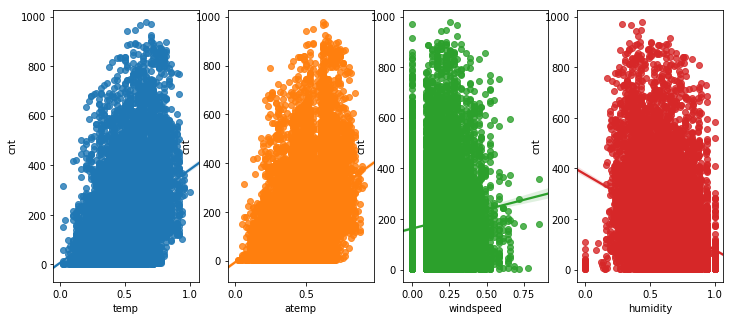

In [8]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="cnt", data=train_data,ax=ax1)
sns.regplot(x="atemp", y="cnt", data=train_data,ax=ax2)
sns.regplot(x="windspeed", y="cnt", data=train_data,ax=ax3)
sns.regplot(x="humidity", y="cnt", data=train_data,ax=ax4)

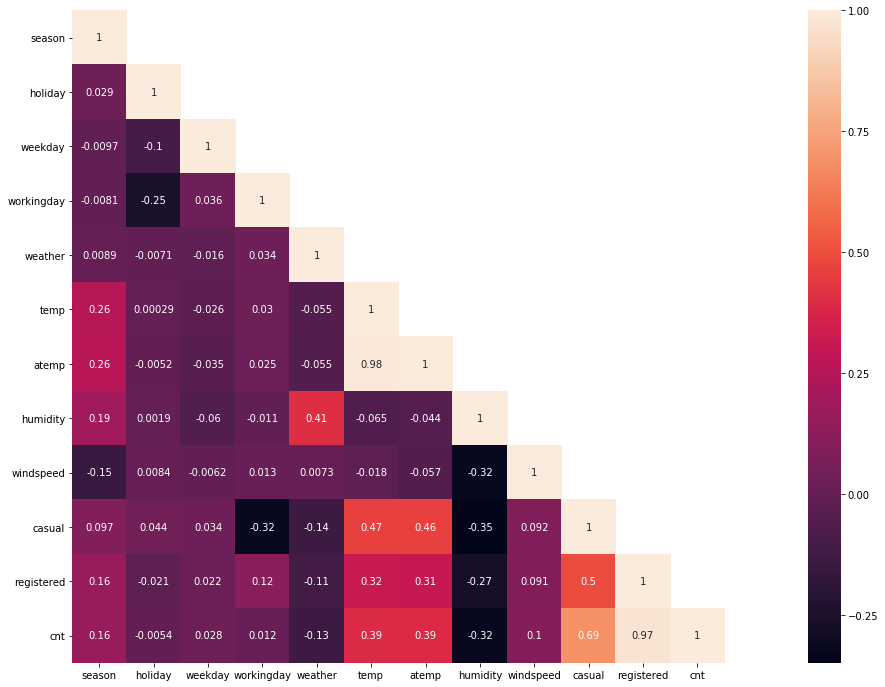

In [9]:
cor= train[:].corr()
corval = np.array(cor)
corval[np.tril_indices_from(corval)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor,mask=corval,square=True,annot=True,cbar=True)

Reshaping Data

In [10]:
train_data['datetime'] = pd.to_datetime(train_data['datetime'])
train_data['weekday'] = train_data['datetime'].dt.weekday_name
train_data['year'] = train_data['datetime'].dt.year.astype(str)
train_data['hour'] = train_data['datetime'].dt.hour
train_data['month'] = train_data['datetime'].dt.month
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data['weekday'] = test_data['datetime'].dt.weekday_name
test_data['year'] = test_data['datetime'].dt.year.astype(str)
test_data['hour'] = test_data['datetime'].dt.hour
test_data['month'] = test_data['datetime'].dt.month

In [11]:
train_data.columns

Index(['datetime', 'season', 'holiday', 'weekday', 'workingday', 'weather',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt',
       'year', 'hour', 'month'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


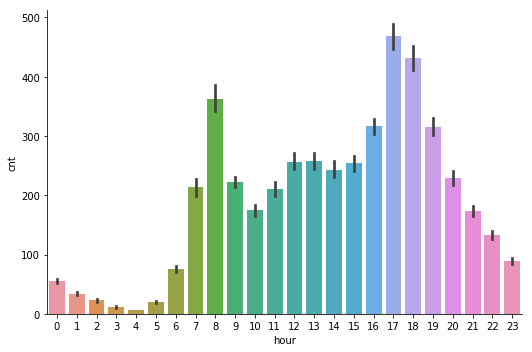

In [12]:
sns.factorplot(x="hour",y="cnt",data=train_data,kind='bar',size=5,aspect=1.5)

+Feature hour_group

In [13]:
def hour_group(s):
    if((0<=s) & (s<=6)):
        return 1
    elif((s==7) | (s==9)):
        return 2
    elif((s==8) | (s==16) | (s==19)):
        return 5
    elif((10<=s) & (s<=15)):
        return 4
    elif((s==17) | (s==18)):
        return 6
    elif(20<=s):
        return 3
train_data['hour_group'] = train_data['hour'].apply(hour_group).astype(str)
test_data['hour_group'] = test_data['hour'].apply(hour_group).astype(str)

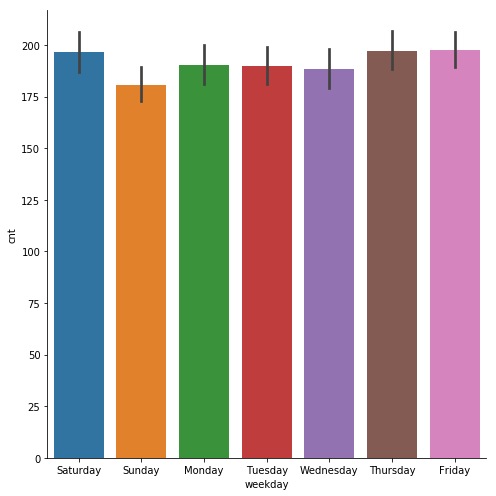

In [14]:
sns.factorplot(x="weekday",y='cnt',kind='bar',data=train_data,size=7,aspect=1)

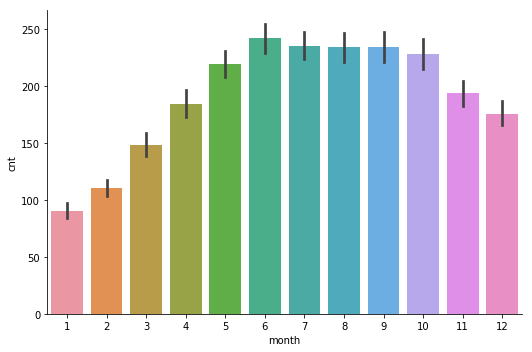

In [15]:
sns.factorplot(x="month",y="cnt",data=train_data,kind='bar',size=5,aspect=1.5)

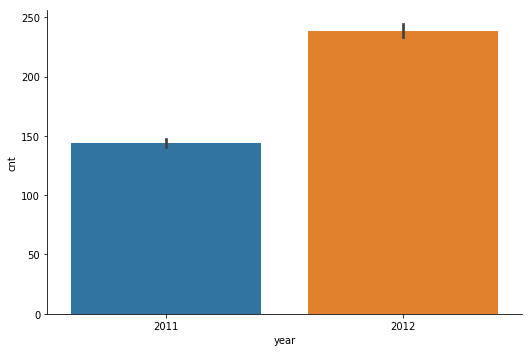

In [16]:
sns.factorplot(x="year",y="cnt",data=train_data,kind='bar',size=5,aspect=1.5)

change data type to String

In [17]:
train_data['season'] = train_data['season'].astype(str)
test_data['season'] = test_data['season'].astype(str)
train_data['weather'] = train_data['weather'].astype(str)
test_data['weather'] = test_data['weather'].astype(str)
train_data['holiday'] = train_data['holiday'].astype(str)
test_data['holiday'] = test_data['holiday'].astype(str)
train_data['workingday'] = train_data['workingday'].astype(str)
test_data['workingday'] = test_data['workingday'].astype(str)

Transform to dummy variables

In [18]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [19]:
train_data.head()

,datetime,temp,atemp,humidity,windspeed,casual,registered,cnt,hour,month,...,weather_3,weather_4,year_2011,year_2012,hour_group_1,hour_group_2,hour_group_3,hour_group_4,hour_group_5,hour_group_6
0,2011-01-01 00:00:00,0.24,0.2879,0.81,0.0,3,13,16,0,1,...,0,0,1,0,1,0,0,0,0,0
1,2011-01-01 01:00:00,0.22,0.2727,0.80,0.0,8,32,40,1,1,...,0,0,1,0,1,0,0,0,0,0
2,2011-01-01 02:00:00,0.22,0.2727,0.80,0.0,5,27,32,2,1,...,0,0,1,0,1,0,0,0,0,0
3,2011-01-01 03:00:00,0.24,0.2879,0.75,0.0,3,10,13,3,1,...,0,0,1,0,1,0,0,0,0,0
4,2011-01-01 04:00:00,0.24,0.2879,0.75,0.0,0,1,1,4,1,...,0,0,1,0,1,0,0,0,0,0


**Manually splitting data and Dropping columns**

In [20]:
x_train = train_data.copy()
del x_train['casual'], x_train['registered'], x_train['cnt'], x_train['datetime'], x_train['windspeed']
x_test = test_data.copy()
del x_test['datetime'], x_test['windspeed']
y_train = train_data['cnt']
y_test = test_data.copy()
y_test = pd.concat([test_data,train_data['cnt']], axis=1)
y_test = y_test.dropna(axis=0)
y_test = y_test['cnt']


**Scaling Variable**

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

**Modelling and Evaluation**

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000,min_samples_leaf=2,
                              random_state=0, n_jobs=-1)
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred = np.expm1(pred)
pred = np.round(pred)

In [23]:
from sklearn.metrics import mean_squared_log_error 
rmsle = np.sqrt(mean_squared_log_error(pred,y_test))
rmsle/10

0.3278069666867137

In [24]:
from sklearn.ensemble import BaggingRegressor
model2 = BaggingRegressor(n_estimators=1000, random_state =0)
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
pred2 = np.expm1(pred2)
pred2 = np.round(pred2)
rmsle2 = np.sqrt(mean_squared_log_error(pred2,y_test))
rmsle2/10

0.32750493687965787

In [25]:
from sklearn import ensemble
model3 = ensemble.GradientBoostingRegressor(max_features=10,learning_rate=0.01,
                                            n_estimators=1000,subsample=0.7,random_state=0)
model3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
pred3 = np.expm1(pred3)
pred3 = np.round(pred3)
rmsle3 = np.sqrt(mean_squared_log_error(pred3,y_test))
rmsle3/10

0.32309969787236187

In [26]:
model_names=['RandomForestRegressor','BaggingRegressor','GradientBoostingRegressor']
RSMLE=[rmsle,rmsle2,rmsle3]
d={'Modelling Algo':model_names,'RMSLE':RSMLE}   
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,3.278070
1,BaggingRegressor,3.275049
2,GradientBoostingRegressor,3.230997


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


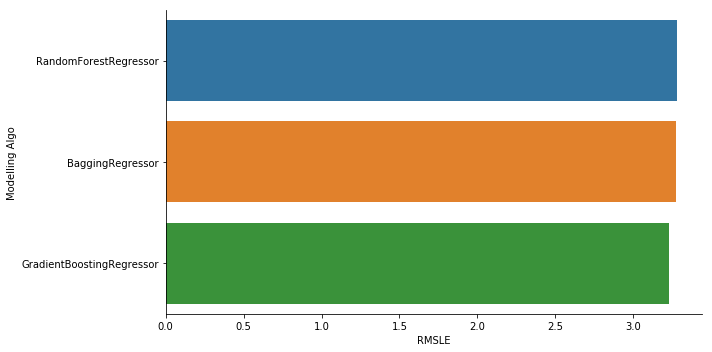

In [27]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

**Submittion**

In [28]:
output1 = pd.DataFrame({'datetime': test_data.datetime,
                       'count': pred})
output1.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [29]:
output2 = pd.DataFrame({'datetime': test_data.datetime,
                       'count': pred2})
output2.to_csv('submission2.csv', index=False)

In [30]:
output3 = pd.DataFrame({'datetime': test_data.datetime,
                       'count': pred3})
output3.to_csv('submission3.csv', index=False)